<a href="https://colab.research.google.com/github/ParameshMalla/dataSciencePractiseNotebooks/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Timeit

In [ ]:
import timeit

In [ ]:
gen = (x*2 for x in range(100))

In [ ]:
genl = [x*2 for x in range(100)]

In [ ]:
%timeit sum(gen)

The slowest run took 122.83 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 98.4 ns per loop


In [ ]:
%timeit sum(genl)

The slowest run took 6.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 578 ns per loop


# Pandas

In [1]:
import pandas as pd
import numpy as np

## Getting Started with pandas

### Series

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
# Setting index
obj2 = pd.Series([4, 7, -5, 3], index=['a','b','c','d'])
obj2

a    4
b    7
c   -5
d    3
dtype: int64

In [ ]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
obj2['a']

4

In [ ]:
'f' in obj2

False

In [ ]:
# Create Series with python dict object
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### DataFrame

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [ ]:
# To Specify the order of column
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
# Passing an unknown column creates missing values
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                      'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
# Retrieving columns
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
# Retrieving rows
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [ ]:
# Nested dict of dicts If the nested dict is passed to the DataFrame, 
# pandas will interpret the outer dict keys as the columns and the inner keys 
# as the row indices:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
     'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
# Teansposing the the frame
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [ ]:
frame3.index.name ='year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Possible data inputs to DataFrame constructor

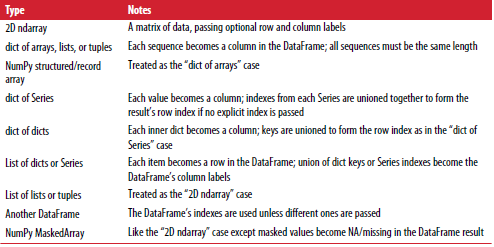

### Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata

In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

Index objects are immutable. Immutability makes it safer to share Index objects among data structures:

In [ ]:
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5,-2.5,0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

Unlike Python sets, a pandas Index can contain duplicate labels:

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

Some Index methods and properties

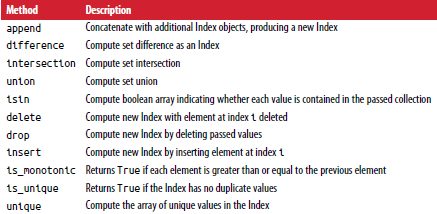

### Reindexing

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing
missing values if any index values were not already present

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

reindex function arguments

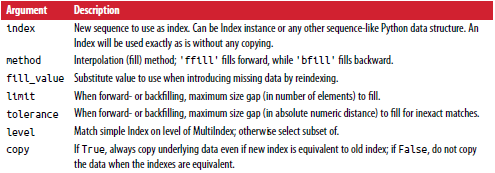

### Dropping Entries from an Axis

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
         index=['Ohio', 'Colorado', 'Utah', 'New York'],
         columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Drop values from the columns by passing axis=1 or axis='columns'

In [ ]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


inplace returns the original object with the manipulation. inplace destroys the any data that is dropped

In [ ]:
obj.drop('c', inplace=True)
obj

d    4.5
b    7.2
a   -5.3
dtype: float64

### Selection with loc and iloc

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [ ]:
data.loc[:,'two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
data.iloc[:,1]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
data.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [ ]:
data.iloc[1,[1,2]]

two      5
three    6
Name: Colorado, dtype: int64

Indexing option with DataFrame

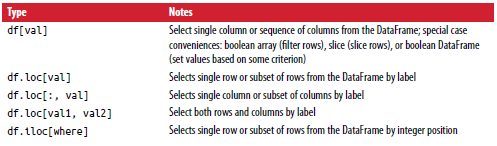

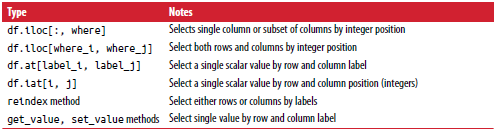

### Function Application and Mapping

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
              index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.227387,-1.200124,-1.357408
Ohio,1.084735,0.775450,0.663959
Texas,0.802982,-0.320797,0.304726
Oregon,-1.083013,-0.298204,-1.315534


In [ ]:
np.abs(frame)

,b,d,e
Utah,0.227387,1.200124,1.357408
Ohio,1.084735,0.775450,0.663959
Texas,0.802982,0.320797,0.304726
Oregon,1.083013,0.298204,1.315534


In [ ]:
# Applying function to columns
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.167748
d    1.975574
e    2.021368
dtype: float64

In [ ]:
frame.apply(f,axis=1)

Utah      1.130021
Ohio      0.420776
Texas     1.123779
Oregon    1.017330
dtype: float64

In [ ]:
def f(x):
  return pd.Series([x.min(),x.max()], index=['min', 'max'])
frame.apply(f, axis=1)

,min,max
Utah,-1.357408,-0.227387
Ohio,0.663959,1.084735
Texas,-0.320797,0.802982
Oregon,-1.315534,-0.298204


In [ ]:
# Element-wise operations in dataframe
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.23,-1.20,-1.36
Ohio,1.08,0.78,0.66
Texas,0.80,-0.32,0.30
Oregon,-1.08,-0.30,-1.32


The reason for the name applymap is that Series has a map method for applying an
element-wise function

In [ ]:
frame['e'].map(format)

Utah      -1.36
Ohio       0.66
Texas      0.30
Oregon    -1.32
Name: e, dtype: object

### Sorting and Ranking

In [ ]:
# Series sorting
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [ ]:
# DataFrame sorting
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                       index=['three', 'one'],
                       columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis=1,ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [ ]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [ ]:
# Ranks all the elements
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
         'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(axis=1)

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


Tie-braking methods with rank

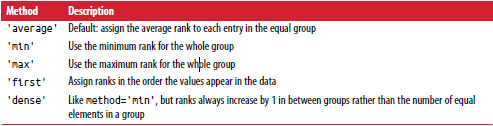

### Axis Indexes 

Descriptive and summary statistics

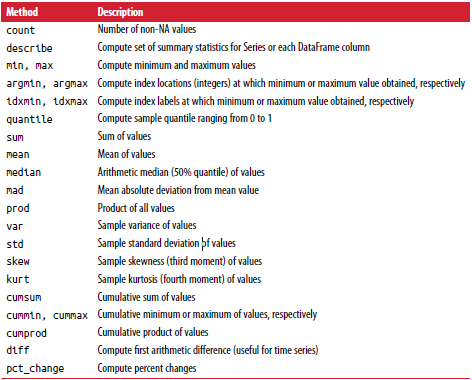

Unique, value counts and set membership methods

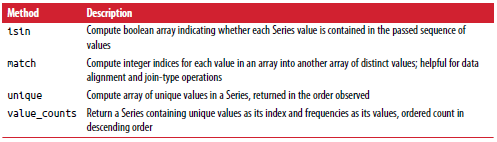

## Data loading, Storage and File Formats

Parsing functions in pandas

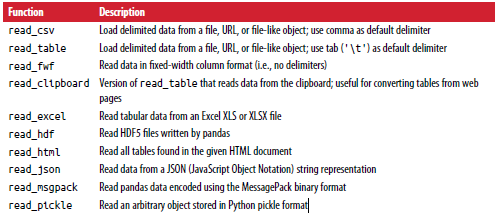

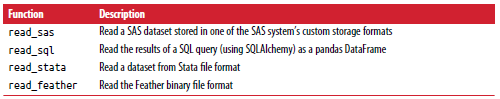

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/'

def getFile(filename):
  r = requests.get(url+filename)
  if r.status_code == 200:
    with open(filename,'wb') as f:
      print('Downloading '+filename)
      f.write(r.content)
    print('Downloaded')
  else:
    print('File not found')
  

In [ ]:
getFile('ex2.csv')

Downloaded


In [ ]:
!cat ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [ ]:
getFile('csv_mindex.csv')

Downloaded


In [ ]:
df = pd.read_csv('ex2.csv', header=None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
pd.read_csv('ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
df.set_index(['key1','key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

Some read_csv function arguments

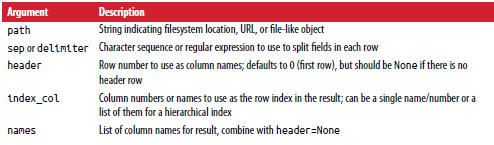

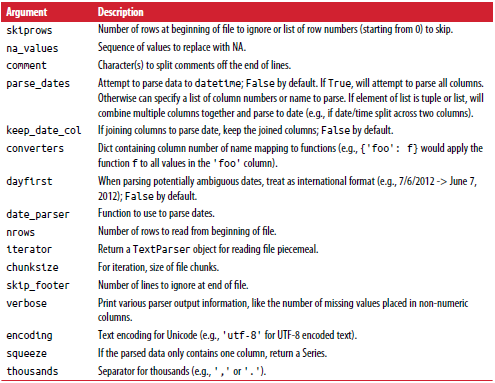

CSV Dialect options

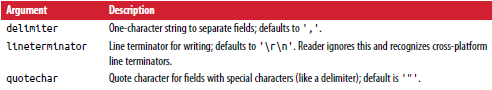

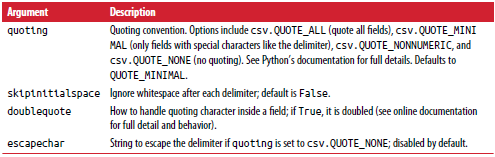

## Data Cleaning and Preparation

### Handling Missing Data




In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [ ]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

NA handling methods

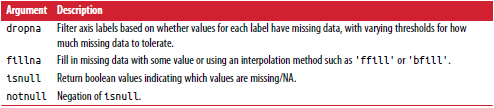

In [ ]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

Fillna function arguments

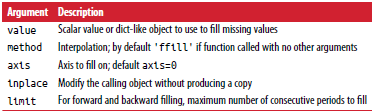

### Data Transformation

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
   'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
# wanted to filter duplicates only based on the 'k1' column

data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [ ]:
# Passing keep='last' will return the last one
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                              'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}
# Add acolumn indicating the animal source of food
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

Using map is a convenient way to perform element-wise transformations and other
data cleaning–related operations.

### Replacing Values

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999,500)

0       1.0
1     500.0
2       2.0
3     500.0
4   -1000.0
5       3.0
dtype: float64

### Discretization and Binning

Continuous data is often discretized or otherwise separated into “bins” for analysis.
Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets:

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [ ]:
# A closely related function, qcut, bins the data based on sample quantiles.
cats = pd.qcut(ages, 4)
cats

[(19.999, 22.75], (19.999, 22.75], (22.75, 29.0], (22.75, 29.0], (19.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64]): [(19.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

In [ ]:
pd.value_counts(cats)

(38.0, 61.0]       3
(29.0, 38.0]       3
(22.75, 29.0]      3
(19.999, 22.75]    3
dtype: int64

### String manipulations

Python built-in string methods

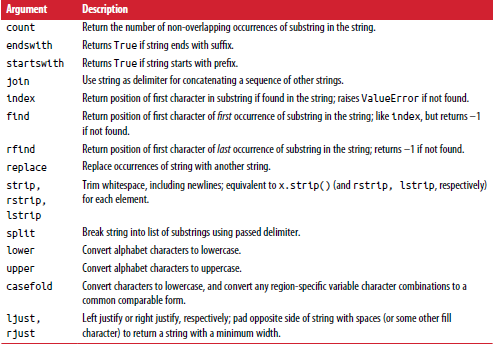

### Regular Expressions

Regular expressions provide a flexible way to search or match (often more complex)
string patterns in text.

In [ ]:
import re

text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
# Creating a regex object with re.compile is highly recommended if you intend to
apply the same expression to many strings; doing so will save CPU cycles.regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

Regular expression methods

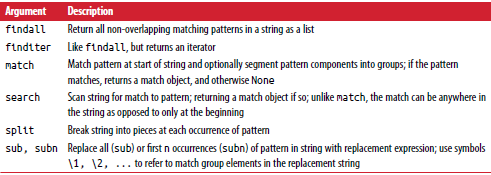

### Vectorized String Functions in pandas

Partial listing of vectorized string methods

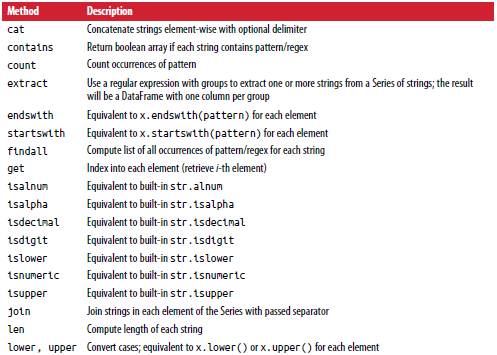

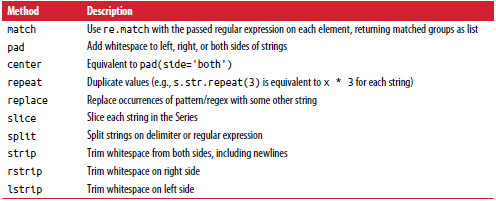

## Data Wrangling: Join, Combine, and Reshape

### Hierarchial Indexing

Hierarchical indexing is an important feature of pandas that enables you to have multiple
(two or more) index levels on an axis.

In [3]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                 [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    1.101639
   2   -1.028343
   3   -0.734429
b  1   -0.730055
   3    1.635994
c  1    0.310024
   2   -0.565641
d  2   -1.292443
   3   -1.669877
dtype: float64

In [4]:
data.unstack()

,1,2,3
a,1.101639,-1.028343,-0.734429
b,-0.730055,NaN,1.635994
c,0.310024,-0.565641,NaN
d,NaN,-1.292443,-1.669877


In [5]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns=[['Ohio', 'Ohio', 'Colorado'],
                 ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [6]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

Different join types with 'how' argument

```IPython
pd.merge(df1, df2, how='outer')
```
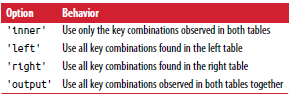


Merge Function arguments

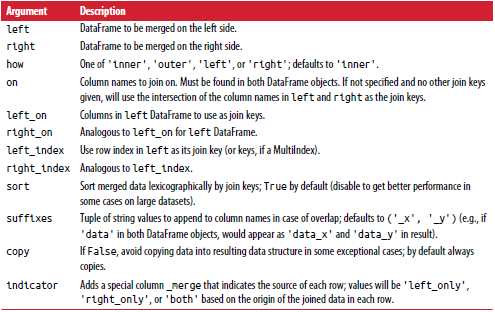